<a href="https://colab.research.google.com/github/Poorna3797/final/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Customer Conversion Prediction**


***A. Import all the Required libraries***

In [ ]:
## Import all the Required libraries 

## Data Analysis libraries
import pandas as pd   ## To handle the dataset
import numpy as np    ## To do Numerical calculation

## Data Visualization libraries
import matplotlib.pyplot as plt    
import seaborn as sns
sns.set_style('darkgrid')   ## To set the default background color 


## Machine Learning libraries
from imblearn.combine import SMOTEENN   ## To handle Imbalanced datasets
from sklearn.preprocessing import StandardScaler  ## To Standardize the features in the dataset
from sklearn.model_selection import train_test_split  ## To Split the dataset
from sklearn.model_selection import StratifiedKFold   ## To do Stratified K fold Cross Validation
from sklearn.neighbors import KNeighborsClassifier  ## To implement k-nearest neighbors algorithm for classification
from sklearn.tree import DecisionTreeClassifier   ## To implement Decision Tree algorithm for classification
from sklearn.ensemble import RandomForestClassifier   ## To implement Random Forest algorithm for classification
from xgboost import XGBClassifier   ## To implement XGBoost algorithm for classification
from sklearn.metrics import roc_auc_score,accuracy_score  ##  Both evaluation metrics used to assess the performance of classification models

## Other libraries
import warnings 
warnings.filterwarnings("ignore")   ## To ignores all warning messages generated by the interpreter

***B. Read the Dataset***

In [ ]:
import pandas as pd 

dataset = pd.read_csv('train.csv')  ## Read the CSV file 
dataset.head(10)    ## To display the first 10 rows of dataset

age           job   marital education_qual call_type  day  mon  dur  \
0   58    management   married       tertiary   unknown    5  may  261   
1   44    technician    single      secondary   unknown    5  may  151   
2   33  entrepreneur   married      secondary   unknown    5  may   76   
3   47   blue-collar   married        unknown   unknown    5  may   92   
4   33       unknown    single        unknown   unknown    5  may  198   
5   35    management   married       tertiary   unknown    5  may  139   
6   28    management    single       tertiary   unknown    5  may  217   
7   42  entrepreneur  divorced       tertiary   unknown    5  may  380   
8   58       retired   married        primary   unknown    5  may   50   
9   43    technician    single      secondary   unknown    5  may   55   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no  
5          1      unknown  no  
6          1      unknown  no  
7          1      unknown  no  
8          1      unknown  no  
9          1      unknown  no

In [ ]:
## To display a concise summary of a dataframe
dataset.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
## To find the shape of a dataframe (number of rows & columns in the dataset)
dataset.shape   

(45211, 11)

In [ ]:
## To checks for missing or null values in a dataframe
dataset.isnull().sum()    

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
## To remove the duplicate values  of a dataframe
dataset = dataset.drop_duplicates()   
dataset.shape 

(45205, 11)

In [ ]:
 ## To find the data types of each column in a dataframe
dataset.dtypes 

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
## To get the statistical summary of a dataframe
dataset.describe()    

age          day           dur     num_calls
count  45205.000000  45205.00000  45205.000000  45205.000000
mean      40.937087     15.80688    258.183055      2.763898
std       10.619130      8.32234    257.538504      3.098189
min       18.000000      1.00000      0.000000      1.000000
25%       33.000000      8.00000    103.000000      1.000000
50%       39.000000     16.00000    180.000000      2.000000
75%       48.000000     21.00000    319.000000      3.000000
max       95.000000     31.00000   4918.000000     63.000000

***C. Missing Value Analysis***

In [ ]:
## To return the count of unique values in the 'age' column of a dataframe
dataset['age'].value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [ ]:
## To return the count of unique values(category) and their counts in the 'job' column of a dataframe
dataset['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

*I counted the unique categories in the 'job' column of a dataframe and used mode imputation technique to replace all occurrences of the string 'unknown' in the 'job' column of the same dataframe.*

In [ ]:
## To replace all occurrences of the string "unknown" in the 'job' column of a dataframe
dataset['job'].replace('unknown', 'blue-collar', inplace = True) 

In [ ]:
## To return the count of unique values(category) and their counts in the 'marital' column of a dataframe
dataset['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
## To return the count of unique values(category) and their counts in the 'education_qual' column of a dataframe
dataset['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

*I counted the unique categories in the 'education_qual' column of a dataframe and used mode imputation technique to replace all occurrences of the string 'unknown' in the 'education_qual' column of the same dataframe.*

In [ ]:
## To replace all occurrences of the string "unknown" in the 'education_qual' column of a dataframe
dataset['education_qual'].replace('unknown', 'secondary', inplace = True)

In [ ]:
## To return the count of unique values(category) and their counts in the 'call_type' column of a dataframe
dataset['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
## To return the count of unique values in the 'day' column of a dataframe
dataset['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
## To return the count of unique values(category) and their counts in the 'mon' column of a dataframe
dataset['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
## To return the count of unique values in the 'dur' column of a dataframe
dataset['dur'].value_counts().sort_index()

0        3
1        2
2        3
3        4
4       15
        ..
3366     1
3422     1
3785     1
3881     1
4918     1
Name: dur, Length: 1573, dtype: int64

In [ ]:
## To return the count of unique values in the 'num_calls' column of a dataframe
dataset['num_calls'].value_counts().sort_index()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
24       20
25       22
26       13
27       10
28       16
29       16
30        8
31       12
32        9
33        6
34        5
35        4
36        4
37        2
38        3
39        1
41        2
43        3
44        1
46        1
50        2
51        1
55        1
58        1
63        1
Name: num_calls, dtype: int64

In [ ]:
## To return the count of unique values(category) and their counts in the 'prev_outcome' column of a dataframe
dataset['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
## To return the count of unique values(category) and their counts in the 'y' column of a dataframe
dataset['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

*D. Outlier Detection*

In [ ]:
import pandas as pd 
import numpy as np

## To get the statistical summary of a dataframe
dataset.describe()

age          day           dur     num_calls
count  45205.000000  45205.00000  45205.000000  45205.000000
mean      40.937087     15.80688    258.183055      2.763898
std       10.619130      8.32234    257.538504      3.098189
min       18.000000      1.00000      0.000000      1.000000
25%       33.000000      8.00000    103.000000      1.000000
50%       39.000000     16.00000    180.000000      2.000000
75%       48.000000     21.00000    319.000000      3.000000
max       95.000000     31.00000   4918.000000     63.000000

In [ ]:
## calculate the IQR for 'age' column
iqr_age = dataset.age.quantile(0.75) - dataset.age.quantile(0.25)
print('IQR            :',iqr_age)

## calculate the lower threshold for 'age' column
lower_limit_age = dataset.age.quantile(0.25) - (1.5 * iqr_age)
print('Lower Threshold:',lower_limit_age)

## calculate the lower threshold for 'age' column
upper_limit_age = dataset.age.quantile(0.75) + (1.5 * iqr_age)
print('Upper Threshold:',upper_limit_age)

## In this the lower and upper thresholds are to be clipped of the 'age' column 
dataset['age'] = dataset['age'].clip(lower_limit_age, upper_limit_age )

IQR            : 15.0
Lower Threshold: 10.5
Upper Threshold: 70.5


In [ ]:
## calculate the IQR for 'dur' column
iqr_dur = dataset.dur.quantile(0.75) - dataset.dur.quantile(0.25)
print('IQR            :',iqr_age)

## calculate the lower threshold for 'dur' column
lower_limit_dur = dataset.dur.quantile(0.25) - (1.5 * iqr_dur)
print('Lower Threshold:',lower_limit_dur)

## calculate the lower threshold for 'dur' column
upper_limit_dur = dataset.dur.quantile(0.75) + (1.5 * iqr_dur)
print('Upper Threshold:',upper_limit_dur)

## In this the lower and upper thresholds are to be clipped of the 'age' column
dataset['dur'] = dataset['dur'].clip(lower_limit_dur,upper_limit_dur)

IQR            : 15.0
Lower Threshold: -221.0
Upper Threshold: 643.0


In [ ]:
## calculate the IQR for 'num_calls' column
iqr_call = dataset.num_calls.quantile(0.75) - dataset.num_calls.quantile(0.25)
print('IQR            :',iqr_call)

## calculate the lower threshold for 'num_calls' column
lower_limit_call = dataset.num_calls.quantile(0.25) - (1.5 * iqr_call)
print('Lower Threshold:',lower_limit_call)

## calculate the lower threshold for 'num_calls' column
upper_limit_call = dataset.num_calls.quantile(0.75) + (1.5 * iqr_call)
print('Upper Threshold:',upper_limit_call) 

## In this the lower and upper thresholds are to be clipped of the 'num_calls' column
dataset['num_calls'] = dataset['num_calls'].clip(lower_limit_call, upper_limit_call)

IQR            : 2.0
Lower Threshold: -2.0
Upper Threshold: 6.0


In [ ]:
## To get the statistical summary of a dataframe
dataset.describe()

age          day          dur     num_calls
count  45205.000000  45205.00000  45205.00000  45205.000000
mean      40.869052     15.80688    234.95620      2.392235
std       10.395247      8.32234    176.75476      1.600152
min       18.000000      1.00000      0.00000      1.000000
25%       33.000000      8.00000    103.00000      1.000000
50%       39.000000     16.00000    180.00000      2.000000
75%       48.000000     21.00000    319.00000      3.000000
max       70.500000     31.00000    643.00000      6.000000

**E. EDA - Exploratory Data Analysis**

E1. Target Variable - ('y')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Encoding the Target variable - 'y'
dataset['target'] = dataset['y'].map({"no":0, "yes":1})

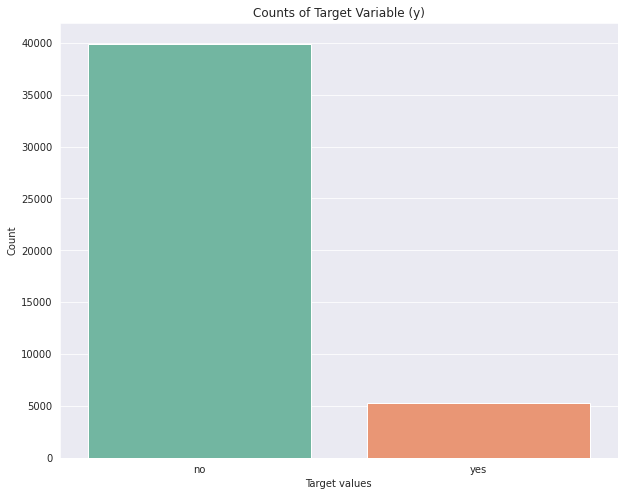

In [ ]:
## Distribution among the Target variable (Total counts)

plt.rcParams['figure.figsize'] = [10,8]   ## To set the size for the Figure
sns.countplot(x='y', data=dataset, palette='Set2')    ## To plot the countplot for the Target variable - 'y' 
plt.xlabel('Target values')   ## To set the name to X-axis of the Figure
plt.ylabel('Count')    ## To set the name to Y-axis of the Figure
plt.title('Counts of Target Variable (y)')    ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot 

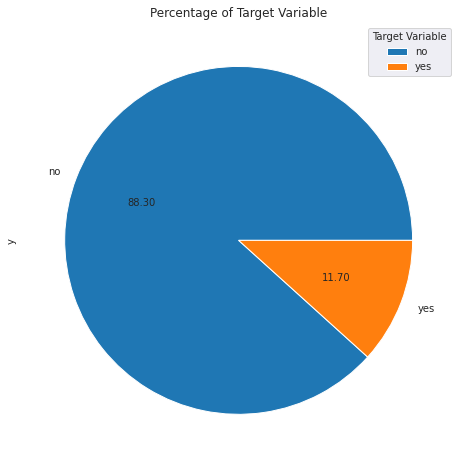

In [ ]:
## Distribution among the Target variable (Percentage)

dataset['y'].value_counts().plot.pie(autopct='%.2f')  ## To plot the pieplot for the Target variable - 'y' 
plt.title("Percentage of Target Variable")    ## To set the name to Title of the Figure
plt.legend(title = "Target Variable")     ## To show legend & name to the legend
plt.show()    ## To show the Final plot 

  E2. Feature - 01 ('age')

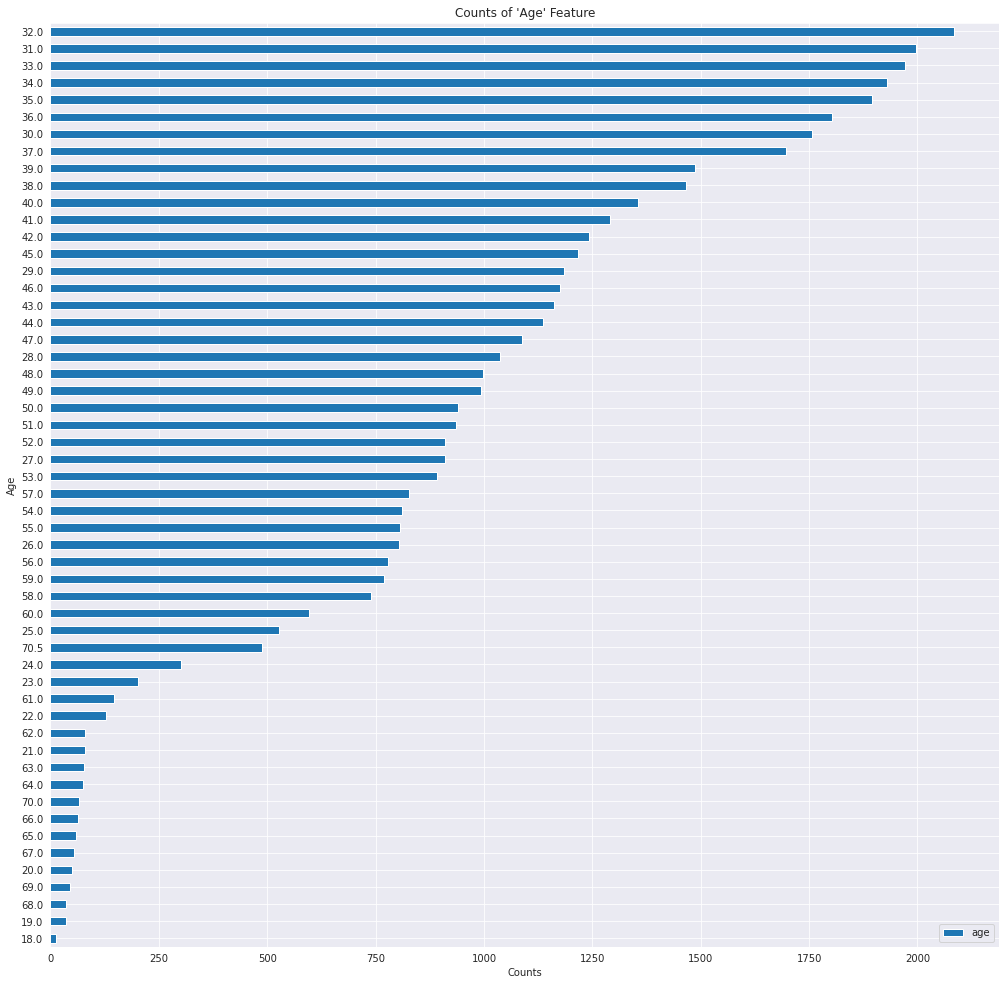

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution among the Feature - 1 ('age') (Total counts)
plt.rcParams['figure.figsize'] = [17,17]    ## To set the size for the Figure
pd.DataFrame(dataset['age'].value_counts().sort_values()).plot(kind='barh')    ## To plot the barplot for the Feature - 1 ('age') (Total counts)
plt.xlabel('Counts')     ## To set the name to X-axis of the Figure
plt.ylabel('Age')     ## To set the name to Y-axis of the Figure
plt.title("Counts of 'Age' Feature")    ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot 

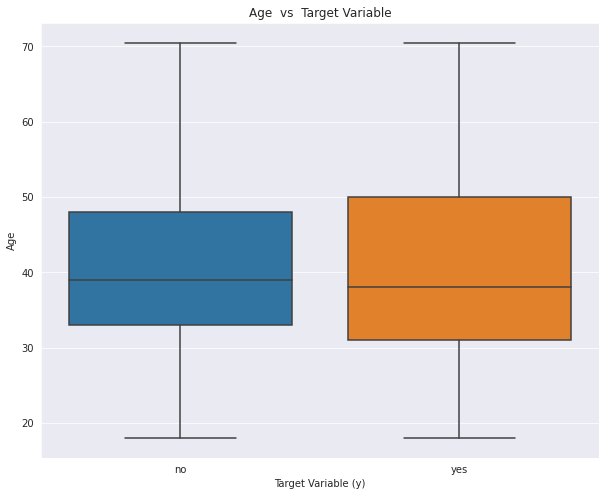

In [ ]:
## Distribution between the Feature - 1 ('age') vs target variable - ('y') 

plt.rcParams['figure.figsize'] = [10,8]   ## To set the size for the Figure
sns.boxplot(data=dataset, x='y', y='age')   ## To plot the boxplot 
plt.xlabel('Target Variable (y)')   ## To set the name to X-axis of the Figure
plt.ylabel('Age')   ## To set the name to Y-axis of the Figure
plt.title('Age  vs  Target Variable')       ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

E3. Feature - 2  ('job')

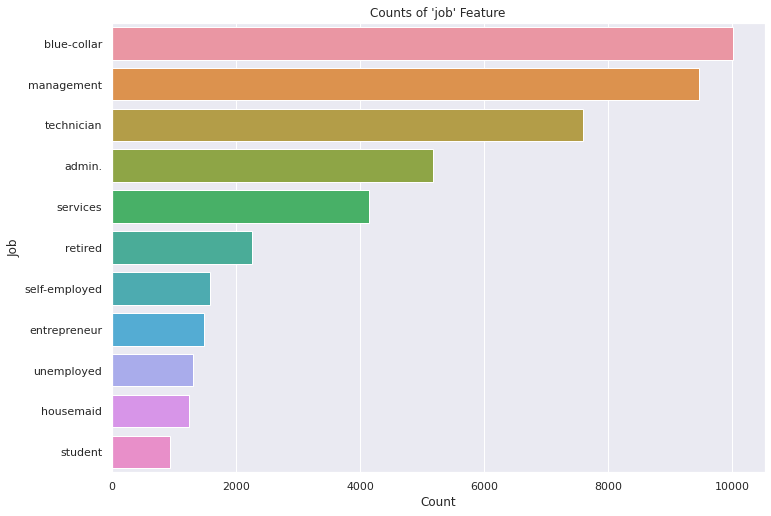

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution among the Feature - 2 ('job') (Total counts)
sns.set(rc={'figure.figsize':(11.7,8.27)})   ## To set the size for the Figure
v_job = pd.DataFrame(dataset['job'].value_counts()).reset_index()   ## To create a dataframe for total counts among the feature - 2 ('job')
v_job.rename(columns= {'index':'Job', 'job':'Count'}, inplace= True)    ## To rename the columns of the dataframe
sns.barplot(x= v_job['Count'], y= v_job['Job'], data= v_job)    ## To plot the barplot for this dataframe
plt.title('Counts of \'job\' Feature')   ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

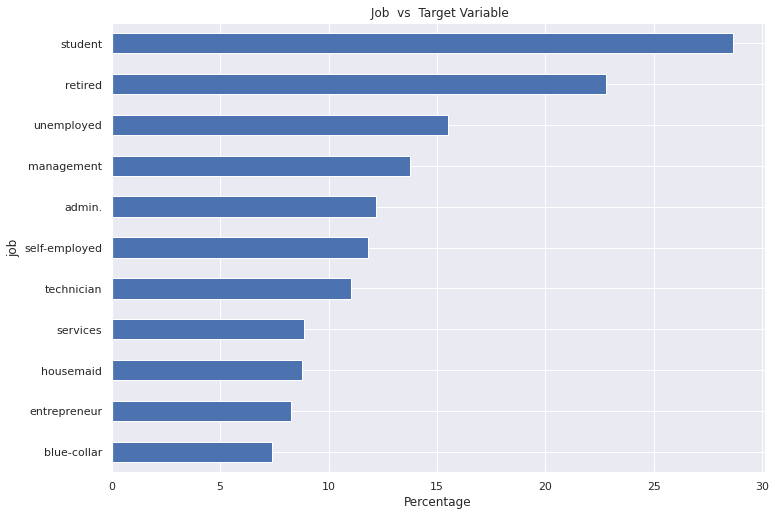

In [ ]:
## Distribution between the Feature - 2 ('job') vs target variable - ('y') 

sns.set(rc={'figure.figsize':(11.7,8.27)})  ## To set the size for the Figure
(dataset.groupby('job')['target'].mean()*100).sort_values().plot(kind='barh')   ## To plot the barplot between the Feature - 2 ('job') vs target variable - ('y') 
plt.xlabel('Percentage')    ## To set the name to X-axis of the Figure
plt.title(' Job  vs  Target Variable')    ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

In [ ]:
## Distribution between the Feature - 2 ('job') vs target variable - ('y') 

#To create a dataframe to show the  percentage between the Feature - 2 ('job') vs target variable - ('y') 
job_per = pd.DataFrame(((dataset.groupby('job')['target'].mean()*100).round(decimals =2)).sort_values(ascending= False)).reset_index()    
job_per.rename(columns= {'target':'Percentage'}, inplace= True)   ## To rename the columns of the dataframe 
job_per   ## To show the dataframe

job  Percentage
0         student       28.68
1         retired       22.79
2      unemployed       15.50
3      management       13.76
4          admin.       12.21
5   self-employed       11.84
6      technician       11.06
7        services        8.89
8       housemaid        8.79
9    entrepreneur        8.27
10    blue-collar        7.41

E4. Feature - 3 ('marital') 

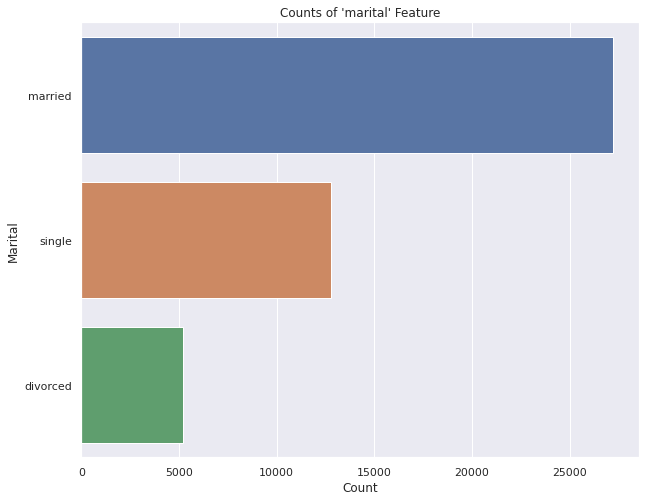

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution among the Feature - 3 ('marital') (Total counts)
plt.rcParams['figure.figsize'] = [10,8]     ## To set the size for the Figure
v_mar = pd.DataFrame(dataset['marital'].value_counts()).reset_index()   ## To create a dataframe for total counts among the feature - 3 ('marital')
v_mar.rename(columns={'index':'Marital', 'marital':'Count'}, inplace=True)  ## To rename the columns of the dataframe
sns.barplot(x= v_mar['Count'], y= v_mar['Marital'], data=v_mar)     ## To plot the barplot for this dataframe
plt.title('Counts of \'marital\' Feature')     ## To set the name to Title of the Figure
plt.show()   ## To show the Final plot

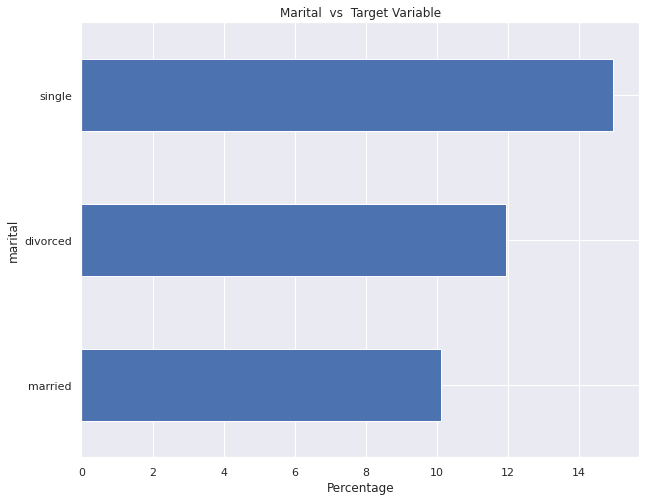

In [ ]:
## Distribution between the Feature - 3 ('marital') vs target variable - ('y') 

plt.rcParams['figure.figsize'] = [10,8]     ## To set the size for the Figure
(dataset.groupby('marital')['target'].mean()*100).sort_values().plot(kind='barh')   ## To plot the barplot between the Feature - 3 ('marital') vs target variable - ('y') 
plt.xlabel('Percentage')     ## To set the name to X-axis of the Figure
plt.title('Marital  vs  Target Variable')     ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

In [ ]:
## Distribution between the Feature - 3 ('marital') vs target variable - ('y') 

#To create a dataframe to show the  percentage between the Feature - 3 ('marital') vs target variable - ('y') 
m_per = pd.DataFrame(((dataset.groupby('marital')['target'].mean()*100).round(decimals = 2)).sort_values(ascending= False)).reset_index()
m_per.rename(columns= {'target':'Percentage'}, inplace = True)     ## To rename the columns of the dataframe 
m_per  ## To show the dataframe

marital  Percentage
0    single       14.95
1  divorced       11.95
2   married       10.12

E5. Feature - 4 ('education_qual')

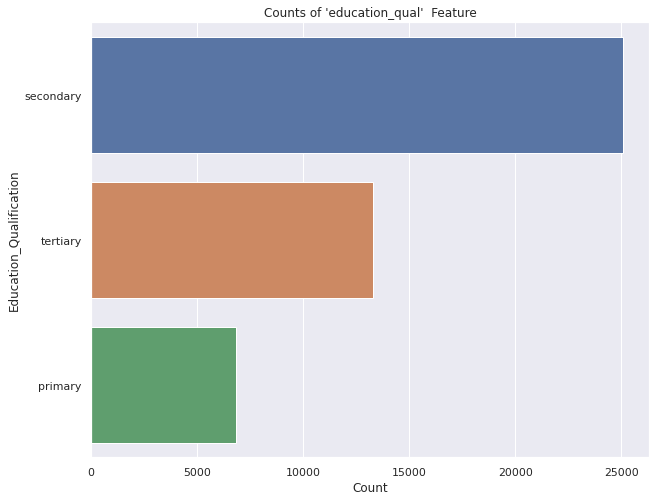

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution among the Feature - 4 ('education_qual') (Total counts)
plt.rcParams['figure.figsize'] = [10,8]   ## To set the size for the Figure
v_edu= pd.DataFrame(dataset['education_qual'].value_counts()).reset_index()   ## To create a dataframe for total counts among the feature - 4 ('education_qual')
v_edu.rename(columns= {'index':'Education_Qualification', 'education_qual':'Count'}, inplace=True)    ## To rename the columns of the dataframe
sns.barplot(x= v_edu['Count'], y= v_edu['Education_Qualification'], data= v_edu)    ## To plot the barplot for this dataframe
plt.title('Counts of \'education_qual\'  Feature')    ## To set the name to Title of the Figure
plt.show()   ## To show the Final plot

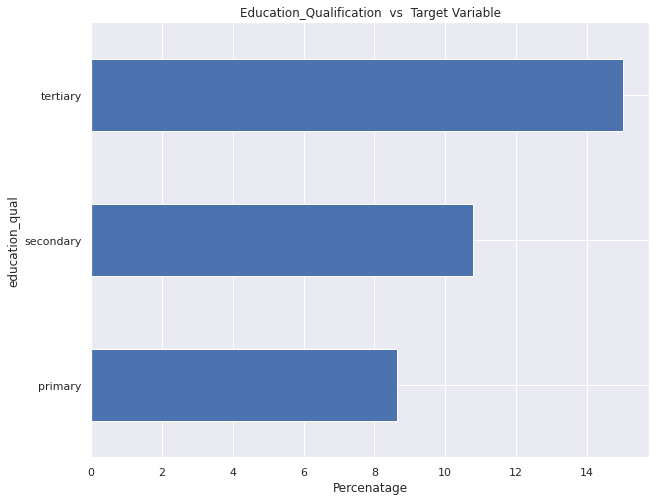

In [ ]:
## Distribution between the Feature - 4 ('education_qual') vs target variable - ('y')

plt.rcParams['figure.figsize'] = [10,8]     ## To set the size for the Figure
(dataset.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind='barh')  ## To plot the barplot between the Feature - 4 ('education_qual') vs target variable - ('y')
plt.xlabel('Percenatage')     ## To set the name to X-axis of the Figure
plt.title('Education_Qualification  vs  Target Variable')    ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

In [ ]:
## Distribution between the Feature - 4 ('education_qual') vs target variable - ('y') 

#To create a dataframe to show the  percentage between the Feature - 4 ('education_qual') vs target variable - ('y') 
e_per = pd.DataFrame(((dataset.groupby('education_qual')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
e_per.rename(columns={'target':'Percentage'}, inplace= True)    ## To rename the columns of the dataframe 
e_per    ## To show the dataframe

education_qual  Percentage
0       tertiary       15.01
1      secondary       10.78
2        primary        8.63

E6. Feature - 5 ('call_type')

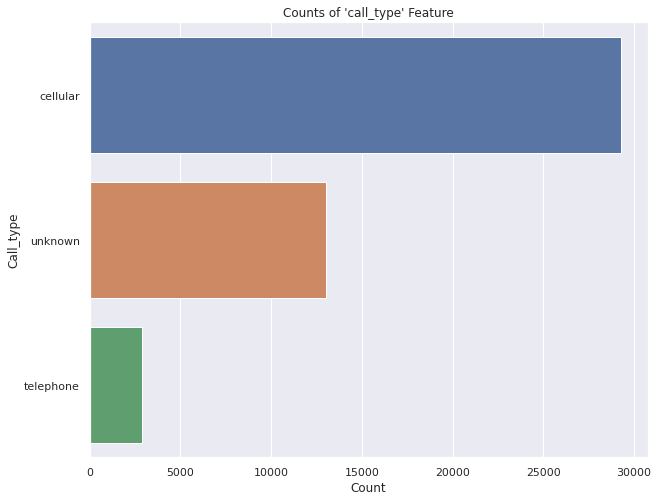

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution among the Feature - 5 ('call_type') (Total counts)
plt.rcParams['figure.figsize'] = [10,8]     ## To set the size for the Figure
v_call= pd.DataFrame(dataset['call_type'].value_counts()).reset_index()   ## To create a dataframe for total counts among the feature - 5 ('call_type')
v_call.rename(columns={'index':'Call_type', 'call_type':'Count'}, inplace= True)    ## To rename the columns of the dataframe
sns.barplot(x= v_call['Count'], y=v_call['Call_type'], data=v_call)   ## To plot the barplot for this dataframe
plt.title('Counts of \'call_type\' Feature')   ## To set the name to Title of the Figure
plt.show()   ## To show the Final plot

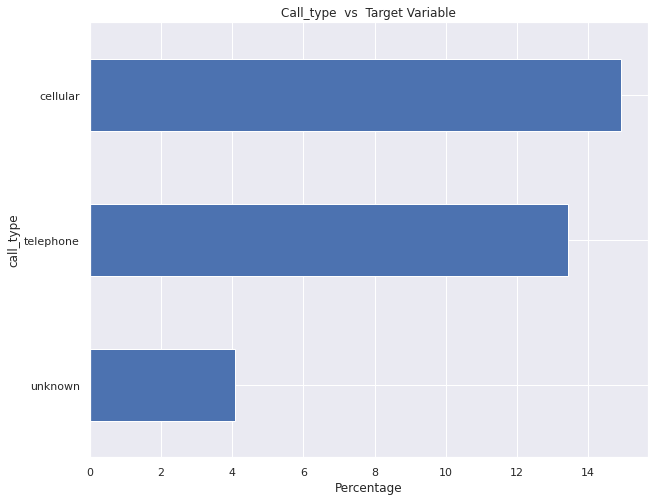

In [ ]:
## Distribution between the Feature - 5 ('call_type') vs target variable - ('y')

plt.rcParams['figure.figsize'] = [10,8]    ## To set the size for the Figure
(dataset.groupby('call_type')['target'].mean()*100).sort_values().plot(kind='barh')    ## To plot the barplot between the Feature - 5 ('call_type') vs target variable - ('y')
plt.xlabel('Percentage')     ## To set the name to X-axis of the Figure
plt.title('Call_type  vs  Target Variable')    ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

In [ ]:
## Distribution between the Feature - 5 ('call_type') vs target variable - ('y') 

#To create a dataframe to show the  percentage between the Feature - 5 ('call_type') vs target variable - ('y')
c_per = pd.DataFrame(((dataset.groupby('call_type')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
c_per.rename(columns={'target':'percentage'}, inplace= True)  ## To rename the columns of the dataframe
c_per  ## To show the dataframe

call_type  percentage
0   cellular       14.92
1  telephone       13.42
2    unknown        4.07

E7. Feature - 6 ('day')

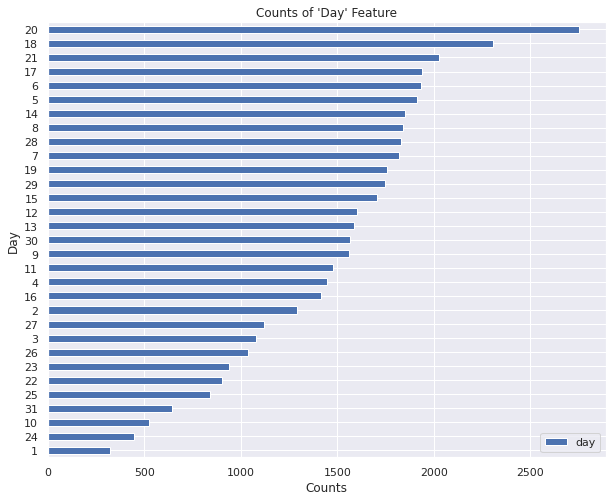

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution among the Feature - 6 ('day') (Total counts)
plt.rcParams['figure.figsize'] = [10, 8]    ## To set the size for the Figure
pd.DataFrame(dataset['day'].value_counts().sort_values()).plot(kind='barh')    ## To create a dataframe for total counts among the feature - 6 ('day')
plt.xlabel('Counts')  ## To set the name to X-axis of the Figure
plt.ylabel('Day')   ## To set the name to Y-axis of the Figure
plt.title("Counts of 'Day' Feature")    ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot 

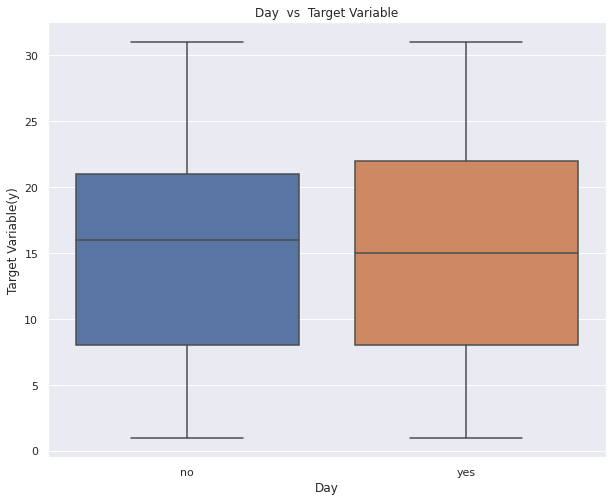

In [ ]:
## Distribution between the Feature - 6 ('day') vs target variable - ('y') 

plt.rcParams['figure.figsize'] = [10,8]    ## To set the size for the Figure
sns.boxplot(data=dataset, x='y', y='day')   ## To plot the boxplot
plt.xlabel('Day')     ## To set the name to X-axis of the Figure
plt.ylabel('Target Variable(y)')    ## To set the name to Y-axis of the Figure
plt.title('Day  vs  Target Variable')     ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot 

E8. Feature - 7 ('mon') 

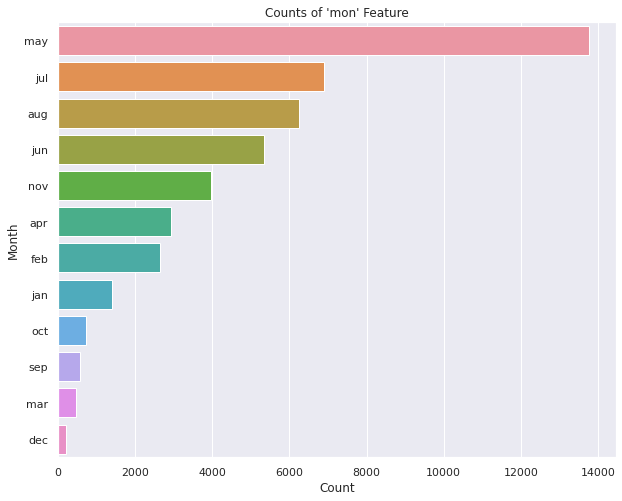

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution among the Feature - 7 ('mon') (Total counts)
plt.rcParams['figure.figsize'] = [10,8]      ## To set the size for the Figure
v_mon = pd.DataFrame(dataset['mon'].value_counts()).reset_index()     ## To create a dataframe for total counts among the feature - 7 ('mon')
v_mon.rename(columns= {'index':'Month', 'mon':'Count'}, inplace= True)    ## To rename the columns of the dataframe
sns.barplot(x= v_mon['Count'], y=v_mon['Month'], data= v_mon)     ## To plot the barplot for this dataframe
plt.title("Counts of 'mon' Feature")     ## To set the name to Title of the Figure
plt.show()   ## To show the Final plot

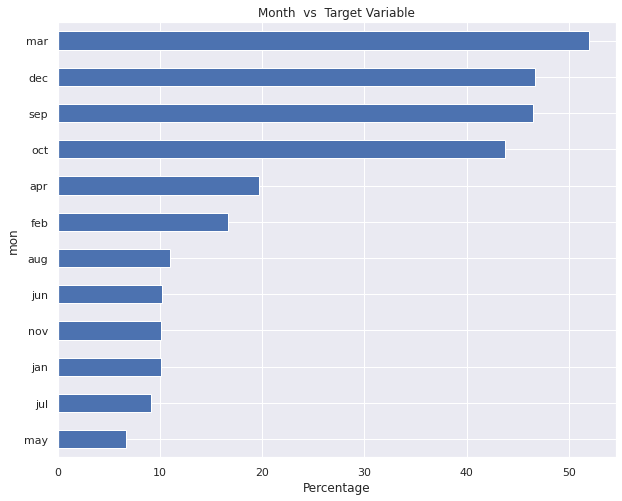

In [ ]:
## Distribution between the Feature - 7 ('mon') vs target variable - ('y')

plt.rcParams['figure.figsize'] = [10,8]     ## To set the size for the Figure
(dataset.groupby('mon')['target'].mean()*100).sort_values().plot(kind= 'barh')    ## To plot the barplot between the Feature - 7 ('mon') vs target variable - ('y')
plt.xlabel('Percentage')     ## To set the name to X-axis of the Figure
plt.title('Month  vs  Target Variable')    ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

In [ ]:
## Distribution between the Feature - 7 ('mon') vs target variable - ('y')

#To create a dataframe to show the percentage between the Feature - 7 ('mon') vs target variable - ('y')
mo_per = pd.DataFrame(((dataset.groupby('mon')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
mo_per.rename(columns={'target':'Percentage'}, inplace= True)   ## To rename the columns of the dataframe
mo_per  ## To show the dataframe

mon  Percentage
0   mar       51.99
1   dec       46.73
2   sep       46.46
3   oct       43.77
4   apr       19.68
5   feb       16.65
6   aug       11.02
7   jun       10.23
8   nov       10.15
9   jan       10.12
10  jul        9.09
11  may        6.72

E9. Feature - 8 ('dur')

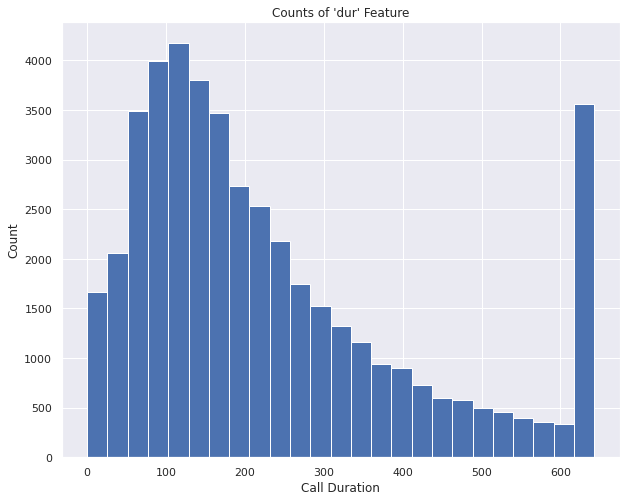

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution among the Feature - 8 ('dur') (Total counts)
plt.rcParams['figure.figsize'] = [10, 8]    ## To set the size for the Figure
plt.hist(dataset.dur, bins= 25)     ## To plot the Histogram
plt.xlabel('Call Duration')    ## To set the name to X-axis of the Figure
plt.ylabel('Count')     ## To set the name to Y-axis of the Figure
plt.title("Counts of 'dur' Feature")  ## To set the name to Title of the Figure
plt.show()  ## To show the Final plot

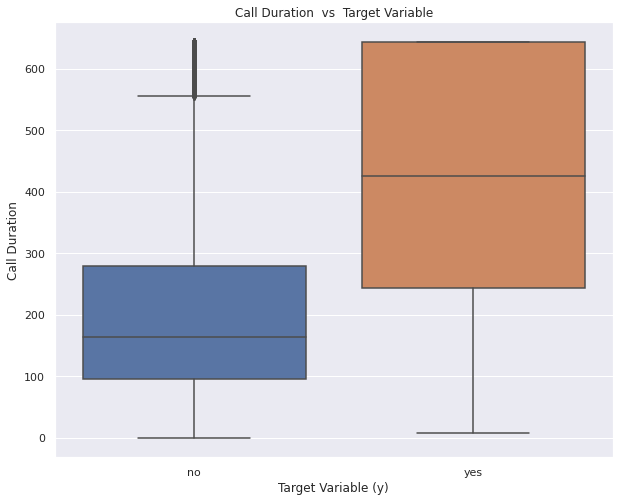

In [ ]:
## Distribution between the Feature - 8 ('dur') vs target variable - ('y')

plt.rcParams['figure.figsize'] = [10,8]     ## To set the size for the Figure
sns.boxplot(data=dataset, x='y', y='dur')     ## To plot the boxplot
plt.xlabel('Target Variable (y)')   ## To set the name to X-axis of the Figure
plt.ylabel('Call Duration')     ## To set the name to Y-axis of the Figure
plt.title('Call Duration  vs  Target Variable')     ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

E10. Feature - 9 ('num_calls')

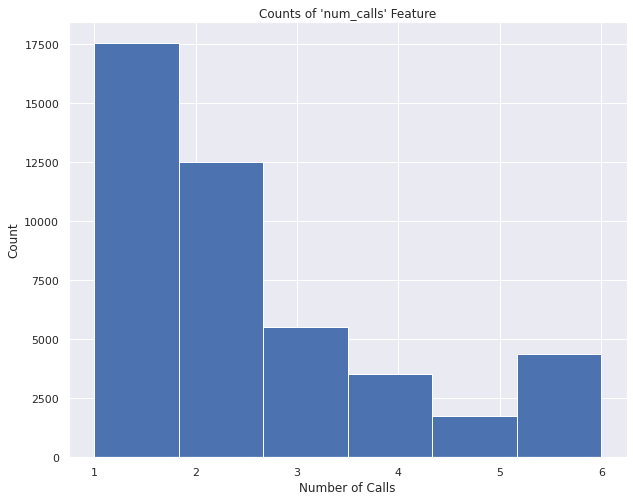

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution among the Feature - 9 ('num_calls') (Total counts)
plt.rcParams['figure.figsize'] = [10, 8]    ## To set the size for the Figure
plt.hist(dataset.num_calls,bins=6)    ## To plot the Histogram
plt.xlabel('Number of Calls')   ## To set the name to X-axis of the Figure
plt.ylabel('Count')   ## To set the name to Y-axis of the Figure
plt.title("Counts of 'num_calls' Feature")  ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

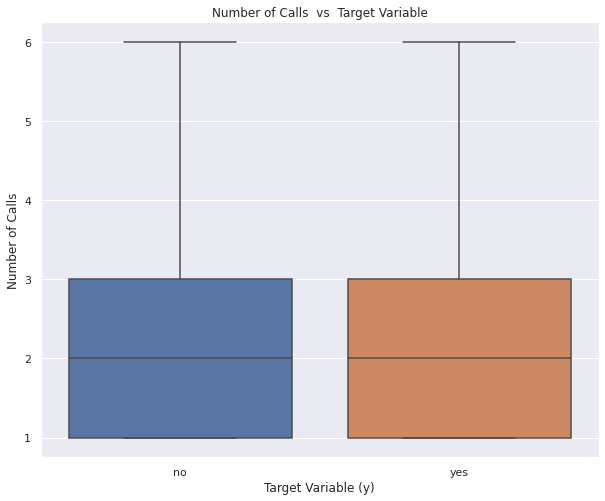

In [ ]:
## Distribution between the Feature - 9('num_calls') vs target variable - ('y')

plt.rcParams['figure.figsize'] = [10,8]     ## To set the size for the Figure
sns.boxplot(data=dataset, x='y', y='num_calls')    ## To plot the boxplot
plt.xlabel('Target Variable (y)')     ## To set the name to X-axis of the Figure
plt.ylabel('Number of Calls')     ## To set the name to Y-axis of the Figure
plt.title('Number of Calls  vs  Target Variable')   ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

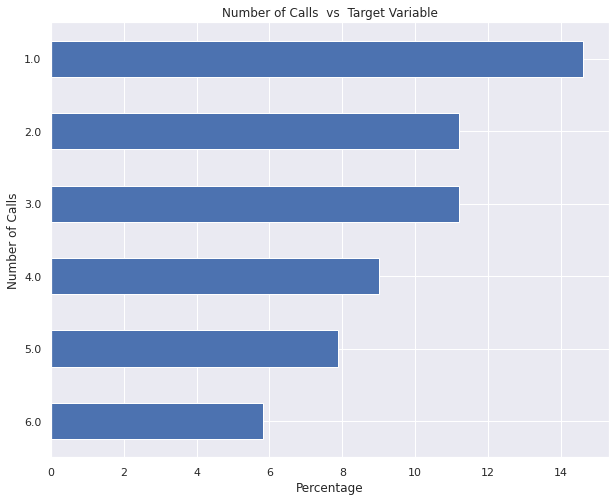

In [ ]:
## Distribution between the Feature - 9 ('num_calls') vs target variable - ('y')

plt.rcParams['figure.figsize'] = [10,8]     ## To set the size for the Figure
(dataset.groupby('num_calls')['target'].mean()*100).sort_values().plot(kind= 'barh')  ## To plot the barplot between the Feature - 9 ('num_calls') vs target variable - ('y')
plt.xlabel('Percentage')   ## To set the name to X-axis of the Figure
plt.ylabel('Number of Calls')    ## To set the name to Y-axis of the Figure
plt.title('Number of Calls  vs  Target Variable')    ## To set the name to Title of the Figure
plt.show()   ## To show the Final plot

E11. Feature - 10 ('prev_outcome')

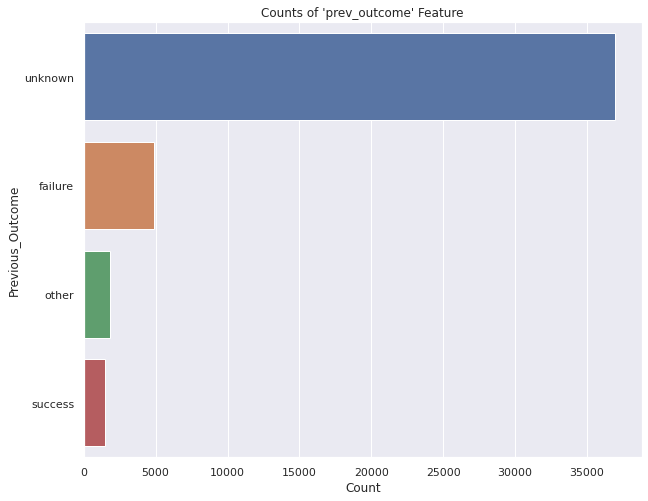

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution among the Feature - 10 ('prev_outcome') (Total counts)
plt.rcParams['figure.figsize'] = [10,8]     ## To set the size for the Figure
v_pre = pd.DataFrame(dataset['prev_outcome'].value_counts()).reset_index()    ## To create a dataframe for total counts among the feature - 10 ('prev_outcome')
v_pre.rename(columns={'index':'Previous_Outcome', 'prev_outcome': 'Count'}, inplace= True)    ## To rename the columns of the dataframe
sns.barplot(x= v_pre['Count'], y= v_pre['Previous_Outcome'], data=v_pre)    ## To plot the barplot for this dataframe
plt.title("Counts of 'prev_outcome' Feature")    ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

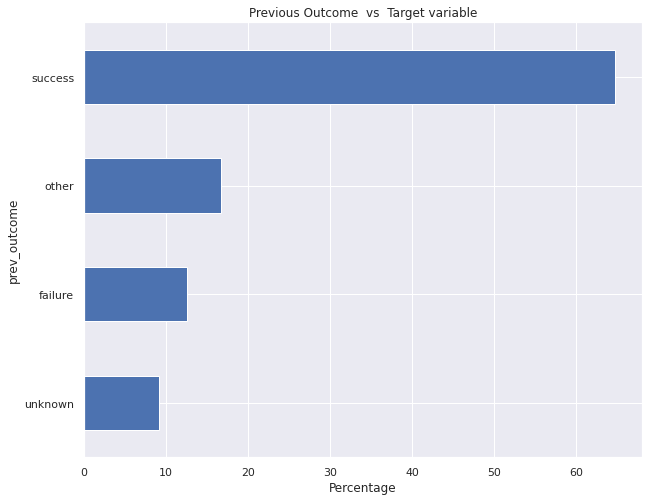

In [ ]:
## Distribution between the Feature - 10 ('prev_outcome') vs target variable - ('y')

plt.rcParams['figure.figsize'] = [10,8]     ## To set the size for the Figure
(dataset.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind='barh')    ## To plot the barplot between the Feature - 10 ('prev_outcome') vs target variable - ('y')
plt.xlabel('Percentage')    ## To set the name to X-axis of the Figure
plt.title('Previous Outcome  vs  Target variable')  ## To set the name to Title of the Figure
plt.show()    ## To show the Final plot

In [ ]:
## Distribution between the Feature - 10 ('prev_outcome') vs target variable - ('y')

#To create a dataframe to show the  percentage between the Feature - 10 ('prev_outcome') vs target variable - ('y')
p_per = pd.DataFrame(((dataset.groupby('prev_outcome')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
p_per.rename(columns={'target':'Percentage'}, inplace= True)    ## To rename the columns of the dataframe
p_per  ## To show the dataframe

prev_outcome  Percentage
0      success       64.73
1        other       16.68
2      failure       12.61
3      unknown        9.16

F. Data Encoding

In [ ]:
## Encode labels in column 'job'
dataset['job'] = dataset['job'].map({'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'services':4, 'technician':5, 'self-employed':6, 'admin':7, 'management':8, 'unemployed':9, 'retired':10, 'student':11})

In [ ]:
## Encode labels in column 'marital'
dataset['marital'] = dataset['marital'].map({'married':1,'divorced':2, 'single':3,})

In [ ]:
## Encode labels in column 'education_qual'
dataset['education_qual'] = dataset['education_qual'].map({'primary': 1, 'secondary':2, 'tertiary':3})

In [ ]:
## Encode labels in column 'call_type'
dataset['call_type'] = dataset['call_type'].map({'unknown':1, 'telephone':2, 'cellular':3})

In [ ]:
## Encode labels in column 'mon'
dataset['mon'] = dataset['mon'].map({'may':1, 'jul':2, 'jan':3, 'nov':4, 'jun':5, 'aug':6, 'feb':7, 'apr':8, 'oct':9, 'sep':10, 'dec':11, 'mar':12})

In [ ]:
## Encode labels in column 'prev_outcome'
dataset['prev_outcome'] = dataset['prev_outcome'].map({'unknown':1, 'failure':2, 'other':3, 'success':4})

In [ ]:
## Encode labels in column 'y'
dataset['y'] = dataset['y'].map({'no':0, 'yes':1})

In [ ]:
## Delete the 'target' column
del dataset['target']

In [ ]:
## Fill the all missing value in the dataset with value '0'
dataset.fillna(0, inplace=True)

In [ ]:
## To display the dataset
dataset

age   job  marital  education_qual  call_type  day  mon    dur  \
0      58.0   8.0        1               3          1    5    1  261.0   
1      44.0   5.0        3               2          1    5    1  151.0   
2      33.0   2.0        1               2          1    5    1   76.0   
3      47.0   1.0        1               2          1    5    1   92.0   
4      33.0   1.0        3               2          1    5    1  198.0   
...     ...   ...      ...             ...        ...  ...  ...    ...   
45206  51.0   5.0        1               3          3   17    4  643.0   
45207  70.5  10.0        2               1          3   17    4  456.0   
45208  70.5  10.0        1               2          3   17    4  643.0   
45209  57.0   1.0        1               2          2   17    4  508.0   
45210  37.0   2.0        1               2          3   17    4  361.0   

       num_calls  prev_outcome  y  
0            1.0             1  0  
1            1.0             1  0  
2            1.0             1  0  
3            1.0             1  0  
4            1.0             1  0  
...          ...           ... ..  
45206        3.0             1  1  
45207        2.0             1  1  
45208        5.0             4  1  
45209        4.0             1  0  
45210        2.0             3  0  

[45205 rows x 11 columns]

G. Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## To split a dataset into two parts X and y

X = dataset.iloc[:, :-1]    
y = dataset.iloc[:, -1 ]

In [ ]:
## To split  all the features of the dataset

X     ## To display the values of X 

age   job  marital  education_qual  call_type  day  mon    dur  \
0      58.0   8.0        1               3          1    5    1  261.0   
1      44.0   5.0        3               2          1    5    1  151.0   
2      33.0   2.0        1               2          1    5    1   76.0   
3      47.0   1.0        1               2          1    5    1   92.0   
4      33.0   1.0        3               2          1    5    1  198.0   
...     ...   ...      ...             ...        ...  ...  ...    ...   
45206  51.0   5.0        1               3          3   17    4  643.0   
45207  70.5  10.0        2               1          3   17    4  456.0   
45208  70.5  10.0        1               2          3   17    4  643.0   
45209  57.0   1.0        1               2          2   17    4  508.0   
45210  37.0   2.0        1               2          3   17    4  361.0   

       num_calls  prev_outcome  
0            1.0             1  
1            1.0             1  
2            1.0             1  
3            1.0             1  
4            1.0             1  
...          ...           ...  
45206        3.0             1  
45207        2.0             1  
45208        5.0             4  
45209        4.0             1  
45210        2.0             3  

[45205 rows x 10 columns]

In [ ]:
## To split a Target variable of the dataset

y     ## To display the values of y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45205, dtype: int64

In [ ]:
## Spliting the values of X and y into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)

***H. Dataset Balancing***

In [ ]:
## To find the shape of a dataframe (number of rows & columns in the dataset)
dataset.shape

(45205, 11)

In [ ]:
## To find the length of a X_train & y_train before balancing dataset
len(X_train), len(y_train)

(31643, 31643)

In [ ]:
from imblearn.combine import SMOTEENN

smote = SMOTEENN(sampling_strategy='all')   ## create a object to do SMOTEENN
X_train,y_train = smote.fit_resample(X_train,y_train)    ## To do sampling for X_train and y_train 

In [ ]:
## To find the length of a X_train & y_train after balancing dataset
len(X_train), len(y_train)

(48155, 48155)

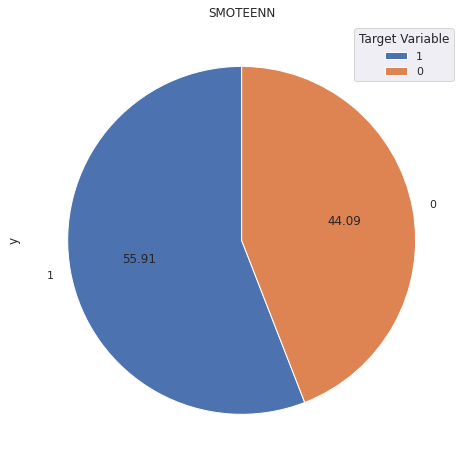

In [ ]:
## Distribution among the Target variable (Percentage)
## balanced dataset

y_train.value_counts().plot.pie(autopct='%.2f',startangle = 90)  ## To plot the pieplot for the Target variable - 'y'
plt.title("SMOTEENN")     ## To set the name to Title of the Figure
plt.legend(title = "Target Variable")  ## To show legend & name to the legend
plt.show()    ## To show the Final plot 

***I. Dataset Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***J. Model  Training***

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

for i in range(1,20,2):
  skf = StratifiedKFold(n_splits=10, random_state=None)
  skf.get_n_splits(X_train, y_train)
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  print('k-value:', i, 'Train-Score:', knn.score(X_train,y_train), 'Stratified CV_Score:',  )

k-value: 1 Train-Score: 1.0 Stratified CV_Score: 10
k-value: 3 Train-Score: 0.964635032706884 Stratified CV_Score: 10
k-value: 5 Train-Score: 0.9500778735333818 Stratified CV_Score: 10
k-value: 7 Train-Score: 0.9421243899906552 Stratified CV_Score: 10
k-value: 9 Train-Score: 0.9355207143598796 Stratified CV_Score: 10
k-value: 11 Train-Score: 0.9311390302149309 Stratified CV_Score: 10
k-value: 13 Train-Score: 0.9276918284705638 Stratified CV_Score: 10
k-value: 15 Train-Score: 0.9252206416779151 Stratified CV_Score: 10
k-value: 17 Train-Score: 0.9229155850898142 Stratified CV_Score: 10
k-value: 19 Train-Score: 0.9212750493199044 Stratified CV_Score: 10


In [ ]:
kn = KNeighborsClassifier(9)
kn.fit(X_train, y_train)
y_predict_knn = kn.predict(X_test)

print('Train-Score:', kn.score(X_test, y_test))
print('Train-Score:', kn.score(X_test, y_test))
print('AUROC Score:', roc_auc_score(y_test, y_predict_knn))

Train-Score: 0.7815956348621147
Train-Score: 0.7815956348621147
AUROC Score: 0.8232195079914599


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score

for depth in range(1,31):
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train)
  trainaccuracy = accuracy_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeClassifier(max_depth=depth)
  valaccuracy = cross_val_score(dt, X_train, y_train, cv=10)
  print('Depth:',depth, 'Training Accuracy:',trainaccuracy, 'CV_Score:', np.mean(valaccuracy))

Depth: 1 Training Accuracy: 0.7842153666081432 CV_Score: 0.7842153398825062
Depth: 2 Training Accuracy: 0.8052211353565756 CV_Score: 0.8052211306933945
Depth: 3 Training Accuracy: 0.8561575119137196 CV_Score: 0.8545481192969948
Depth: 4 Training Accuracy: 0.8627205083187024 CV_Score: 0.8618007517220411
Depth: 5 Training Accuracy: 0.8786890728199983 CV_Score: 0.8777488659516395
Depth: 6 Training Accuracy: 0.8900175570604465 CV_Score: 0.8859632814711527
Depth: 7 Training Accuracy: 0.902704623359251 CV_Score: 0.9003641535875418
Depth: 8 Training Accuracy: 0.9152871833458741 CV_Score: 0.9063001366449642
Depth: 9 Training Accuracy: 0.9274099155588997 CV_Score: 0.9145562446049702
Depth: 10 Training Accuracy: 0.9364810634562327 CV_Score: 0.9219555213651915
Depth: 11 Training Accuracy: 0.946492768163197 CV_Score: 0.9271393324316861
Depth: 12 Training Accuracy: 0.9578421536660814 CV_Score: 0.9328244269473653
Depth: 13 Training Accuracy: 0.9679165621603545 CV_Score: 0.936377728967684
Depth: 14 T

In [ ]:
tr = DecisionTreeClassifier(max_depth=15)
tr.fit(X_train, y_train)
y_predict_dt = tr.predict(X_test)

print('Training Accuracy:', tr.score(X_train, y_train))
print('Test Accuracy    :', tr.score(X_test, y_test))
print('AUROC Score      :',roc_auc_score(y_test, y_predict_dt))

Training Accuracy: 0.9828818660647103
Test Accuracy    : 0.8287863147028461
AUROC Score      : 0.8000080541350549


In [ ]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(n_estimators=100,max_depth=6, max_features='sqrt')
tree.fit(X_train,y_train)
y_pred_rf = tree.predict(X_test)

print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy  :",tree.score(X_test,y_test))
print("AUROC Score       :", roc_auc_score(y_test,y_pred_rf))

Training Accuracy : 0.9102708803611738
Testing Accuracy  : 0.7554932900752102
AUROC Score       : 0.824355172332669


In [ ]:
from xgboost import XGBClassifier

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.2,0.5,0.7,1]:
    model = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) 
    model.fit(X_train,y_train) 
    model.score(X_test, y_test) 
    print('Learning rate :', lr, 'Train score :', model.score(X_train,y_train), 'CV_Score :', np.mean(cross_val_score(model, X_train, y_train, cv=10))) 

Learning rate : 0.01 Train score : 0.9153916896580554 CV_Score : 0.9124867854534271
Learning rate : 0.02 Train score : 0.9297299556893236 CV_Score : 0.9243171377597916
Learning rate : 0.03 Train score : 0.9412674525541342 CV_Score : 0.9360011646274765
Learning rate : 0.04 Train score : 0.949732463840816 CV_Score : 0.9432749971168262
Learning rate : 0.05 Train score : 0.9562745589833626 CV_Score : 0.9496918891952625
Learning rate : 0.06 Train score : 0.9606011203076665 CV_Score : 0.9531408028503232
Learning rate : 0.07 Train score : 0.9655129169801856 CV_Score : 0.9551474219184115
Learning rate : 0.08 Train score : 0.9674149318618844 CV_Score : 0.9567987771848342
Learning rate : 0.09 Train score : 0.9692751442187109 CV_Score : 0.9587636470226425
Learning rate : 0.1 Train score : 0.9725566424212022 CV_Score : 0.960477488528463
Learning rate : 0.11 Train score : 0.9725775436836385 CV_Score : 0.9613136788249232
Learning rate : 0.12 Train score : 0.9756918317866399 CV_Score : 0.962734987401

In [ ]:
tree = XGBClassifier(learning_rate = 0.16, n_estimators=100, verbosity = 0)
tree.fit(X_train,y_train)
y_pred_x = tree.predict(X_test)

print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("AUCROC Score :", roc_auc_score(y_test,y_pred_x))

Training Accuracy : 0.9792868489256751
Testing Accuracy : 0.8742810794868013
AUCROC Score : 0.849303716373008
